# Calculate velocity errors over stable surfaces (Stable Surface Error) for all velocity maps in a folder

Generates a table with all velocity map parameters, including the stable surface error.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import fiona
import rasterio as rio
from rasterio.mask import mask
from shapely.geometry import mapping
import subprocess

### Set paths to velocity maps, the stable surface masks (ssm), and a glacier shapefile (UTM projection)

In [4]:
# path to autorift velocity maps:
autorift_outp = '/Volumes/SURGE_DISK/LO_autorift_output_dt5to60/'
# autorift_outp = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/output_autoRIFT/'

# set path to folder with the stable surface mask (should have been generated when running custom autoRIFT)
# contains files named ssm_#m.tif
# refvpath = '/Volumes/SURGE_DISK/LO/'
refvpath = '/Volumes/SURGE_DISK/LO/'
# refvpath = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/forAutoRIFT/'
print(os.listdir(refvpath))

# read in glacier shapefile and grab outline as shapes
shp_path = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/LO_polygon_UTM08.shp'
# shp_path = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/Turner_RGI/TG_glims_polygon_UTM7.shp'
with fiona.open(shp_path) as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

['Screen Shot 2023-10-24 at 2.55.50 PM.png', '._Screen Shot 2023-10-24 at 2.55.50 PM.png', 'LO_Box_UTM08.prj', 'LO_polygon_UTM08.shp', '._LO_polygon_UTM08.shp', 'LO_polygon_UTM08.cpg', 'LO_polygon_UTM08.shx', 'LO_Box_WGS.prj', 'LO_Box_UTM08.qpj', '.DS_Store', '._.DS_Store', 'LS9_20230623_5m_clipped.TIF', 'LO_Box_WGS_UTM_08.shp', 'LO_polygon_WGS.prj', 'LSimages', 'LO_Box_WGS_UTM_08.shx', 'itslive-data (1).zip', '._itslive-data (1).zip', 'LO_Box_WGS_UTM_07.prj', 'LO_Box_WGS_UTM_08.dbf', 'LO_polygon_UTM08.dbf', 'LO_Box_WGS.geojson', 'LO_Box_UTM08.shp', 'LO_Box_UTM08.cpg', 'LO_polygon_UTM08.prj', 'LO_Box_WGS.shx', 'LO_Box_WGS.qmd', 'LO_Box_UTM08.shx', 'LO_Box_WGS.shp', 'LO_Box_WGS.cpg', 'LO_polygon_WGS.shx', 'LO_polygon_WGS.qmd', 'LO_polygon_UTM08.qpj', 'LO_Box_WGS_UTM_08.prj', 'LO_Box_WGS_UTM_07.dbf', 'LO_polygon_WGS.shp', 'LO_polygon_WGS.cpg', 'LO_polygon_WGS.dbf', 'LO_Box_WGS_UTM_07.shp', 'LO_Box_WGS_UTM_07.shx', 'Screen Shot 2023-10-24 at 2.57.37 PM.png', '._Screen Shot 2023-10-24 at 2

In [5]:
# # reproject certain files 

# for file in os.listdir(autorift_outp):
#     if file.startswith('velocity') and 'S2' in file and 'rp' not in file:
#         os.remove(autorift_outp+file)
        
# #         rp_cmd = 'gdalwarp -s_srs EPSG:32631 -t_srs EPSG:32633 '+autorift_outp+file+' '+autorift_outp+file[:-4]+'_rp.tif'
# #         print(rp_cmd)
        
# #         os.system(rp_cmd)


### Grab important information and Stable Surface Error (SSE) from each velocity map

velocity_20210119_20210127_100m_S2.tif


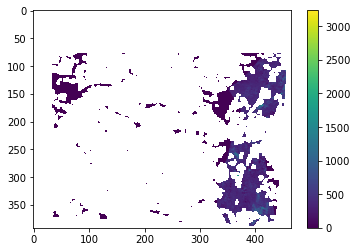

velocity_20210127_20210203_100m_S2.tif


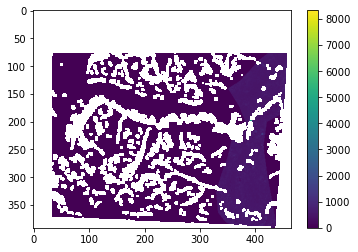

velocity_20210203_20210208_100m_S2.tif


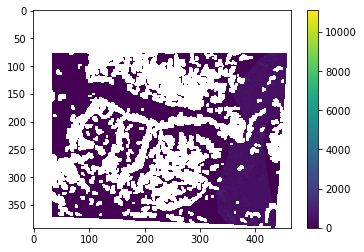

velocity_20210208_20210213_100m_S2.tif


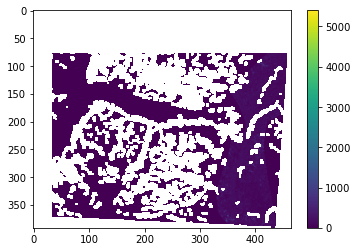

velocity_20210213_20210223_100m_S2.tif


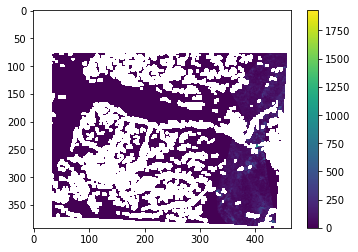

velocity_20210223_20210308_100m_S2.tif


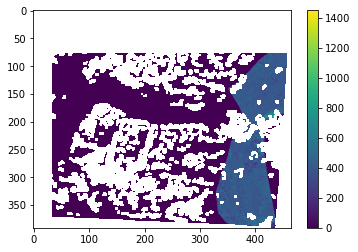

velocity_20210308_20210315_100m_S2.tif


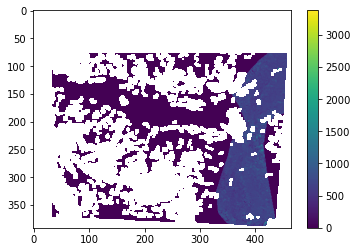

velocity_20210315_20210320_100m_S2.tif


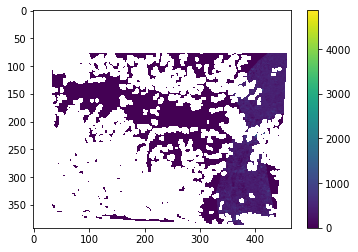

velocity_20210320_20210325_100m_S2.tif


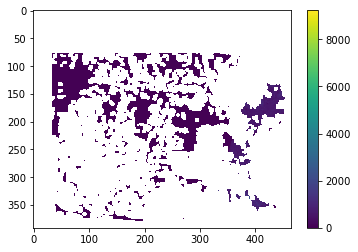

velocity_20210325_20210402_100m_S2.tif


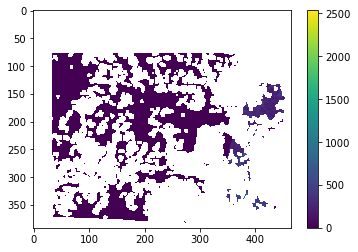

velocity_20210402_20210407_100m_S2.tif


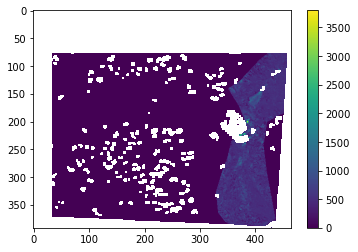

velocity_20210407_20210417_100m_S2.tif


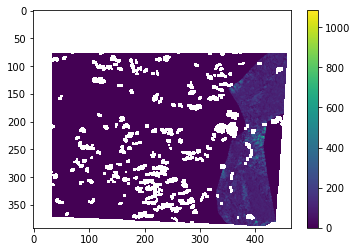

velocity_20210417_20210422_100m_S2.tif


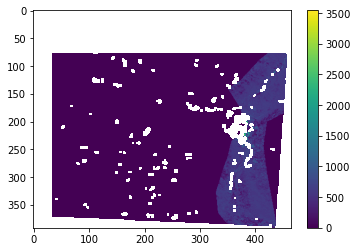

velocity_20210422_20210427_100m_S2.tif


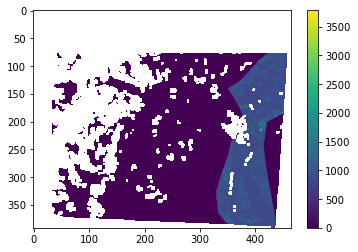

velocity_20210427_20210502_100m_S2.tif


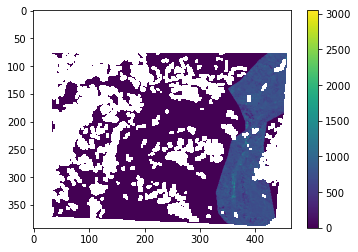

velocity_20210502_20210507_100m_S2.tif


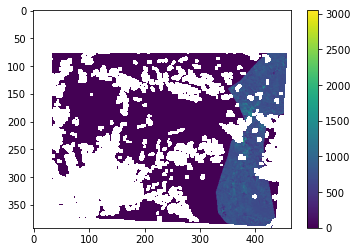

velocity_20210507_20210512_100m_S2.tif


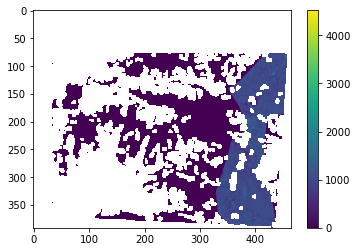

velocity_20210512_20210517_100m_S2.tif


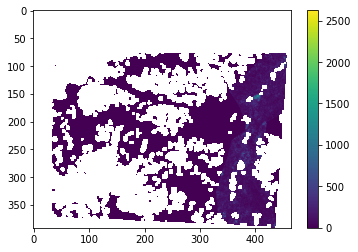

velocity_20210517_20210601_100m_S2.tif


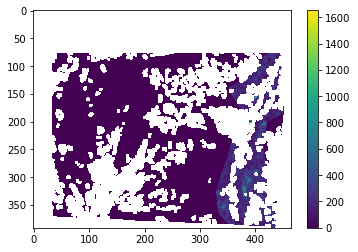

velocity_20210601_20210608_100m_S2.tif


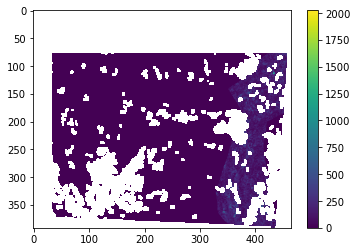

velocity_20210608_20210613_100m_S2.tif


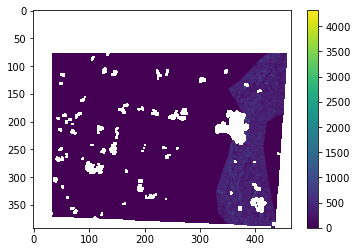

velocity_20210613_20210623_100m_S2.tif


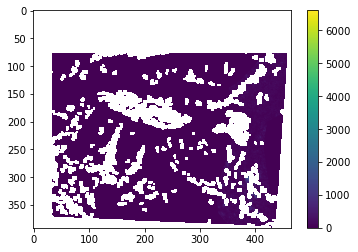

velocity_20210623_20210628_100m_S2.tif


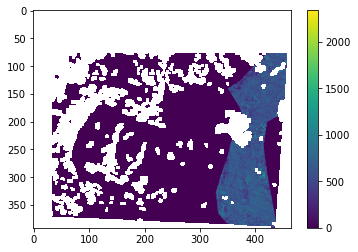

velocity_20210628_20210703_100m_S2.tif


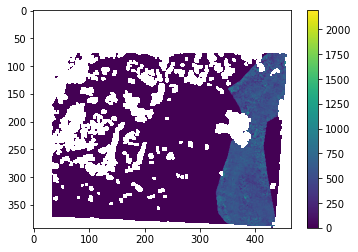

velocity_20210703_20210708_100m_S2.tif


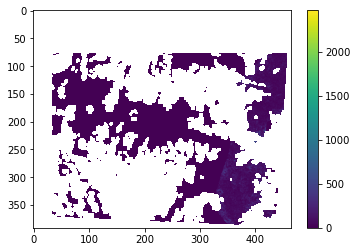

velocity_20210708_20210718_100m_S2.tif


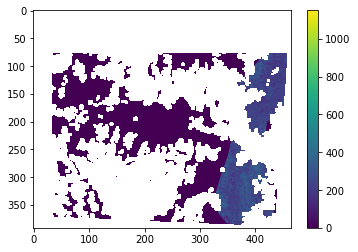

velocity_20210718_20210728_100m_S2.tif


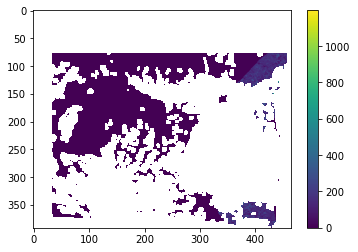

velocity_20210728_20210807_100m_S2.tif


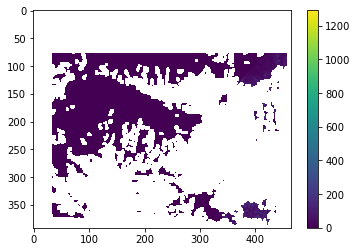

velocity_20210807_20210815_100m_S2.tif


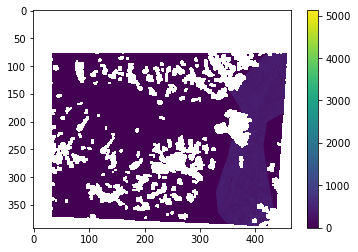

velocity_20210815_20210820_100m_S2.tif


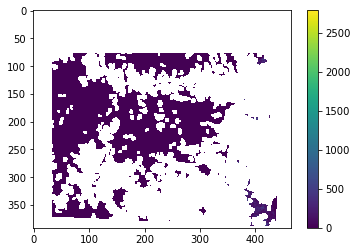

velocity_20210820_20210830_100m_S2.tif


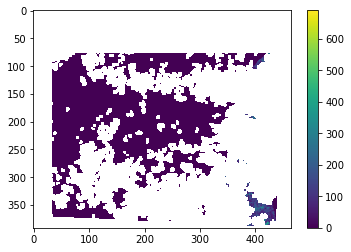

velocity_20210830_20210919_100m_S2.tif


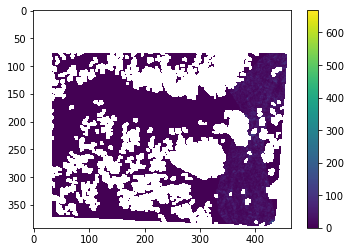

velocity_20210919_20210924_100m_S2.tif


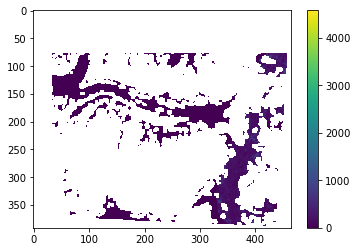

velocity_20210924_20210929_100m_S2.tif


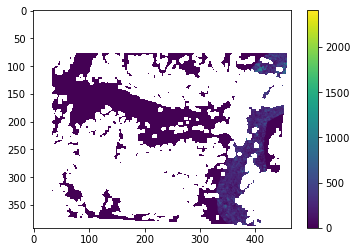

velocity_20210929_20211009_100m_S2.tif


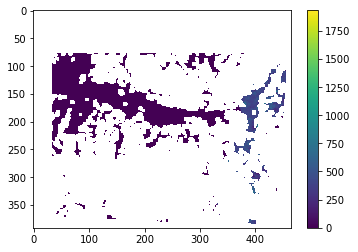

velocity_20211009_20211016_100m_S2.tif


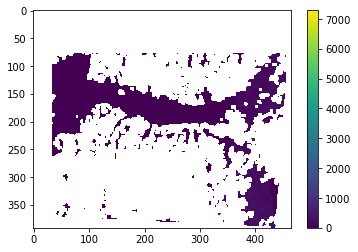

velocity_20211016_20211021_100m_S2.tif


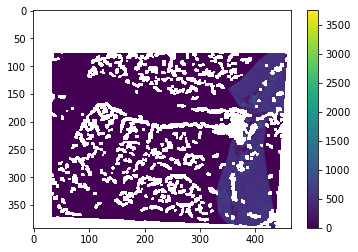

velocity_20211021_20211031_100m_S2.tif


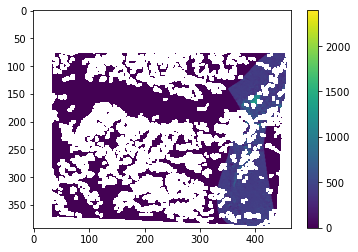

velocity_20211031_20211113_100m_S2.tif


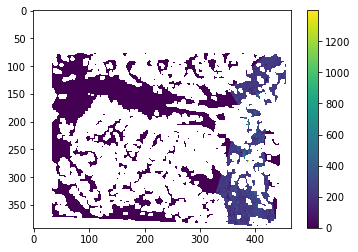

velocity_20220117_20220221_100m_S2.tif


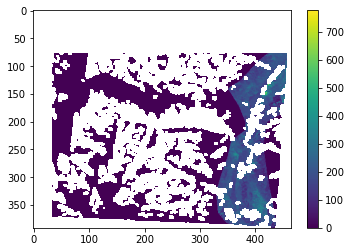

velocity_20220221_20220303_100m_S2.tif


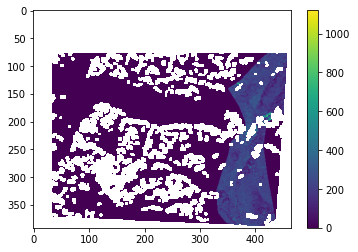

velocity_20220303_20220308_100m_S2.tif


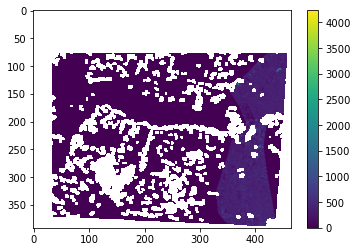

velocity_20220308_20220320_100m_S2.tif


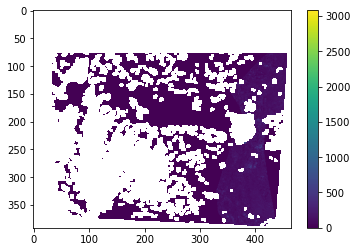

velocity_20220320_20220402_100m_S2.tif


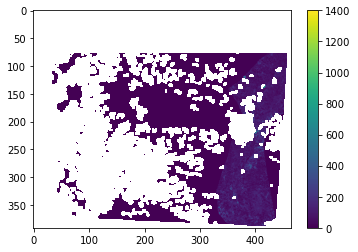

velocity_20220402_20220412_100m_S2.tif


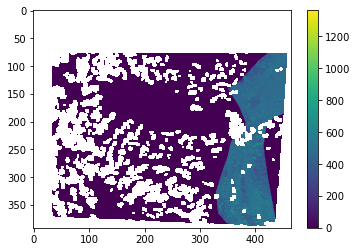

velocity_20220412_20220417_100m_S2.tif


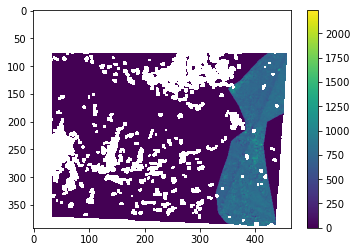

velocity_20220417_20220422_100m_S2.tif


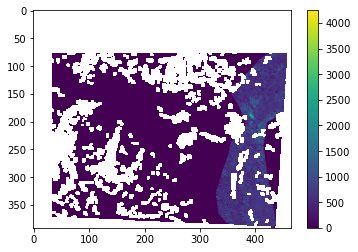

velocity_20220422_20220504_100m_S2.tif


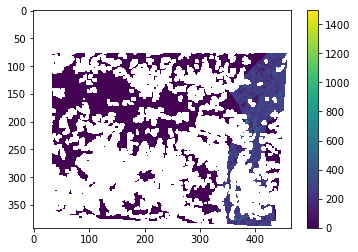

velocity_20220504_20220512_100m_S2.tif


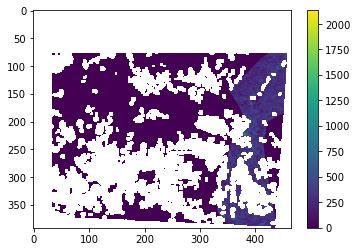

velocity_20220512_20220519_100m_S2.tif


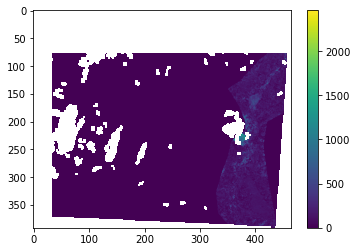

velocity_20220519_20220524_100m_S2.tif


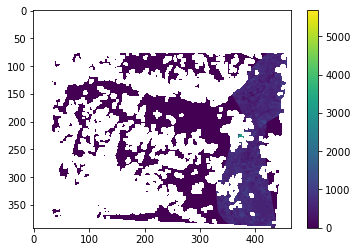

velocity_20220524_20220529_100m_S2.tif


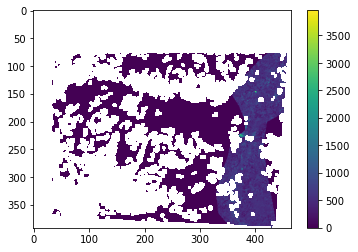

velocity_20220529_20220603_100m_S2.tif


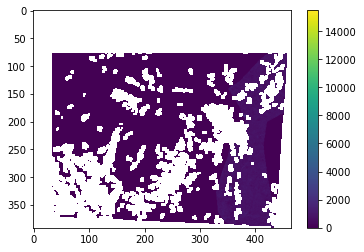

velocity_20220603_20220608_100m_S2.tif


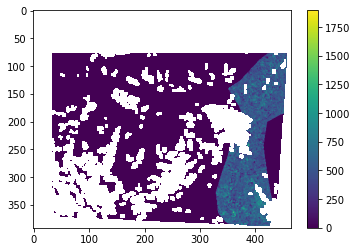

velocity_20220608_20220616_100m_S2.tif


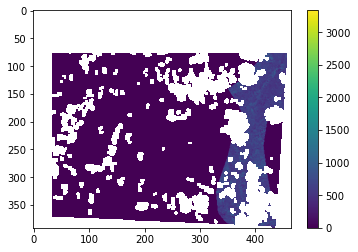

velocity_20220616_20220621_100m_S2.tif


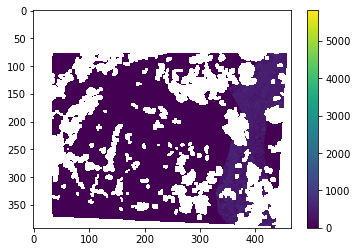

velocity_20220621_20220626_100m_S2.tif


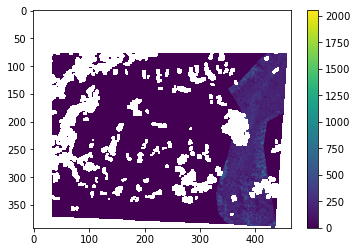

velocity_20220626_20220701_100m_S2.tif


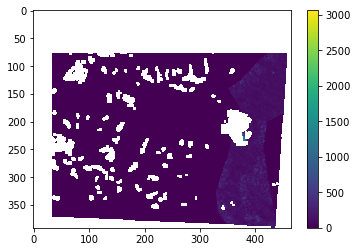

velocity_20220701_20220706_100m_S2.tif


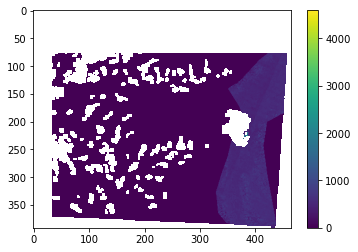

velocity_20220706_20220718_100m_S2.tif


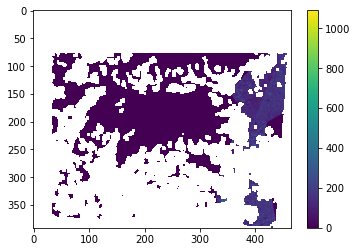

velocity_20220718_20220726_100m_S2.tif


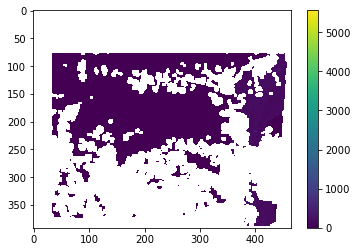

velocity_20220726_20220807_100m_S2.tif


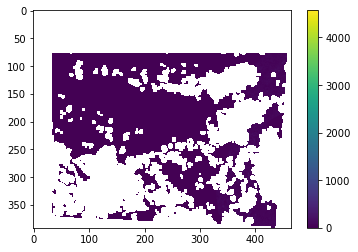

velocity_20220807_20220812_100m_S2.tif


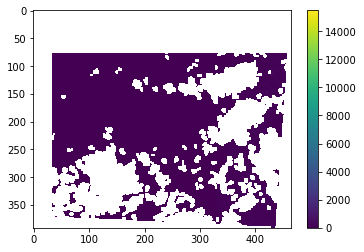

velocity_20220812_20220820_100m_S2.tif


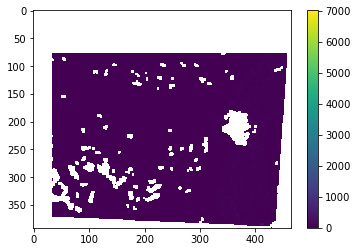

velocity_20220820_20220904_100m_S2.tif


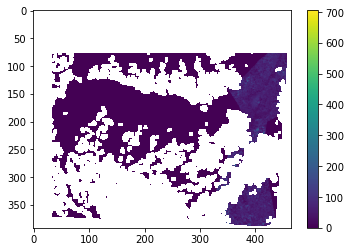

velocity_20220904_20220911_100m_S2.tif


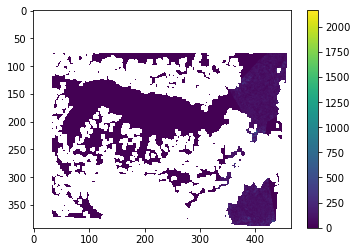

velocity_20220911_20220916_100m_S2.tif


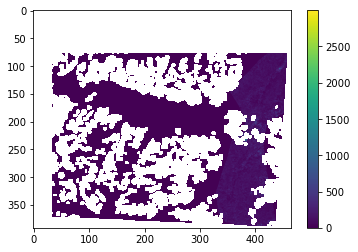

velocity_20220916_20221004_100m_S2.tif


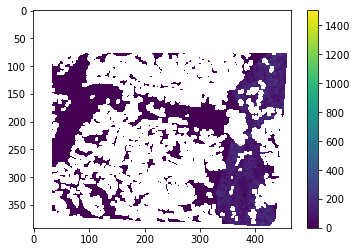

velocity_20221004_20221029_100m_S2.tif


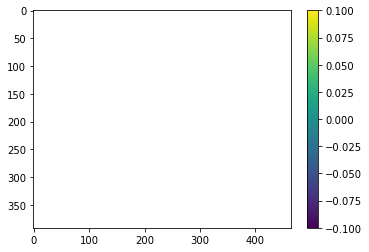

velocity_20221029_20221108_100m_S2.tif


/var/folders/mr/7f69f7y50zj85n420pyvh8cr0000gq/T/ipykernel_83594/3428572880.py:58: RuntimeWarning: Mean of empty slice
  err_vx.append(np.sqrt(np.nanmean(ssm_masked_vx**2))/365)
/var/folders/mr/7f69f7y50zj85n420pyvh8cr0000gq/T/ipykernel_83594/3428572880.py:59: RuntimeWarning: Mean of empty slice
  err_vy.append(np.sqrt(np.nanmean(ssm_masked_vy**2))/365)
/var/folders/mr/7f69f7y50zj85n420pyvh8cr0000gq/T/ipykernel_83594/3428572880.py:60: RuntimeWarning: Mean of empty slice
  err_v.append(np.sqrt(np.nanmean(ssm_masked_v**2))/365)


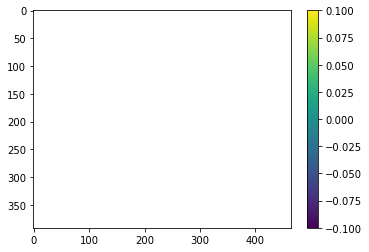

velocity_20221108_20221118_100m_S2.tif


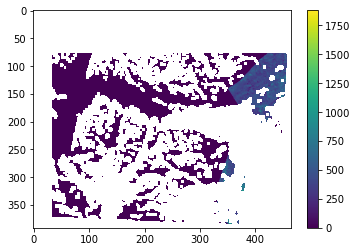

velocity_20210328_20210422_100m_LS.tif


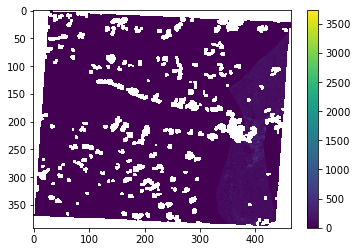

velocity_20210422_20210609_100m_LS.tif


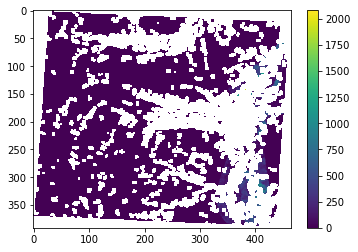

velocity_20210609_20210616_100m_LS.tif


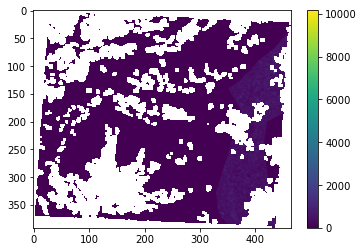

velocity_20210616_20210702_100m_LS.tif


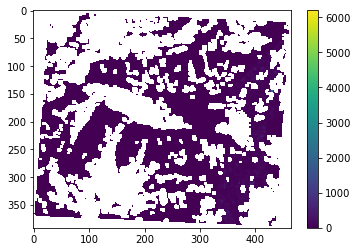

velocity_20210702_20210718_100m_LS.tif


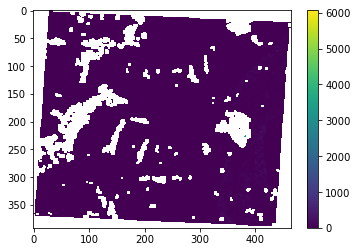

velocity_20210929_20211107_100m_LS.tif


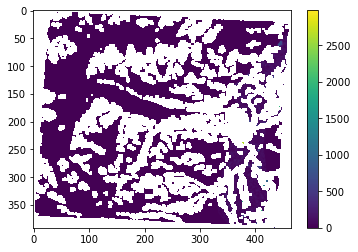

velocity_20220219_20220307_100m_LS.tif


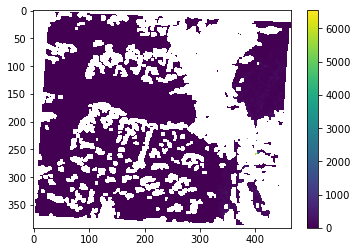

velocity_20220307_20220417_100m_LS.tif


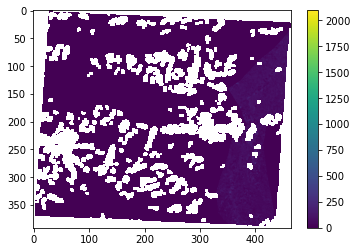

velocity_20220417_20220518_100m_LS.tif


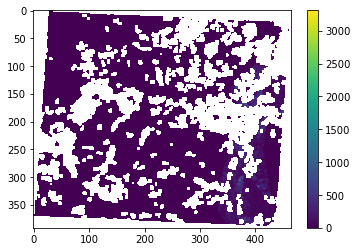

velocity_20220518_20220526_100m_LS.tif


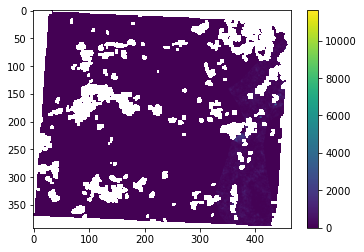

velocity_20220526_20220603_100m_LS.tif


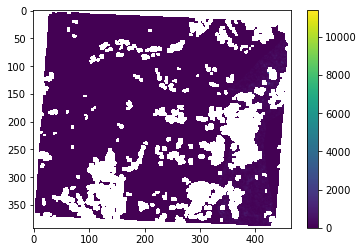

velocity_20220603_20220611_100m_LS.tif


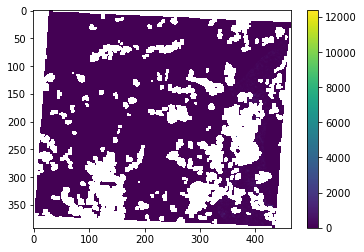

velocity_20220611_20220627_100m_LS.tif


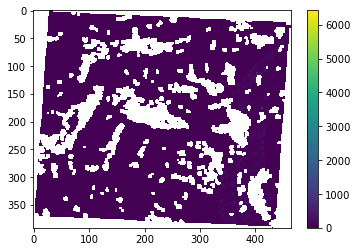

velocity_20220627_20220706_100m_LS.tif


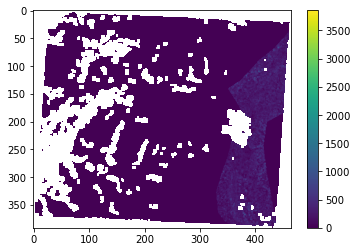

velocity_20220706_20220807_100m_LS.tif


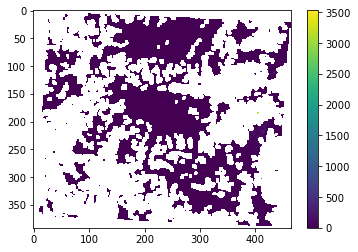

velocity_20220807_20220915_100m_LS.tif


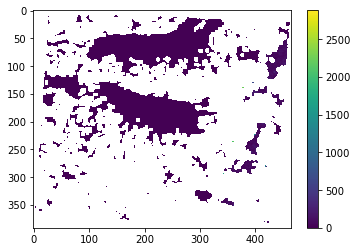

velocity_20220915_20221025_100m_LS.tif


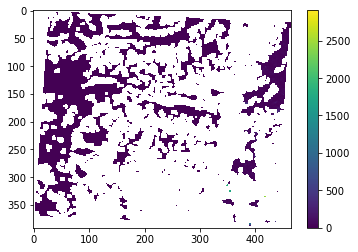

velocity_20221025_20221111_100m_LS.tif


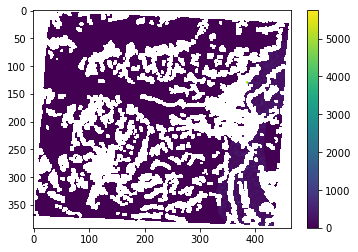

velocity_20221111_20221118_100m_LS.tif


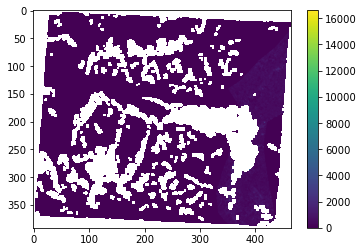

velocity_20221118_20221127_100m_LS.tif


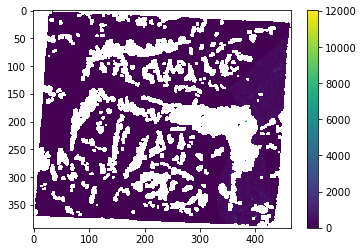

velocity_20210202_20210208_100m_PS.tif


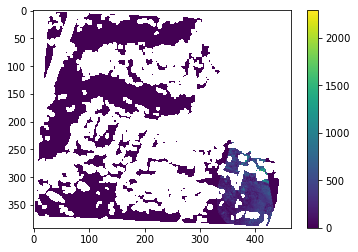

velocity_20210208_20210213_100m_PS.tif


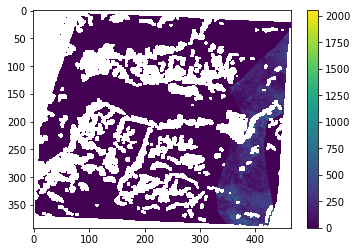

velocity_20210213_20210222_100m_PS.tif


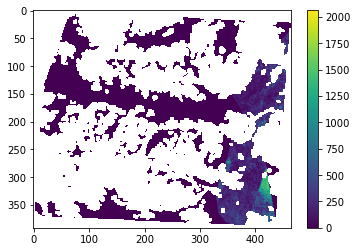

velocity_20210222_20210304_100m_PS.tif


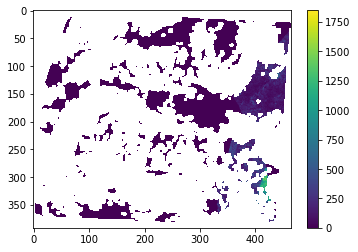

velocity_20210304_20210309_100m_PS.tif


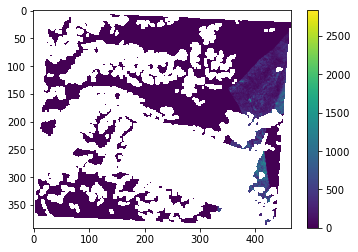

velocity_20210309_20210316_100m_PS.tif


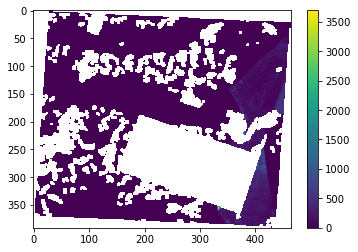

velocity_20210316_20210324_100m_PS.tif


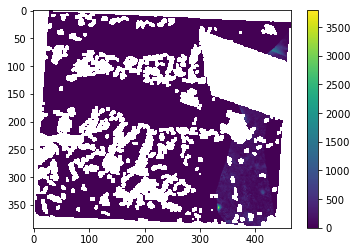

velocity_20210324_20210415_100m_PS.tif


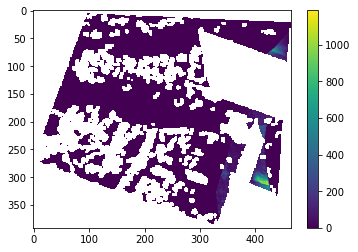

velocity_20210415_20210420_100m_PS.tif


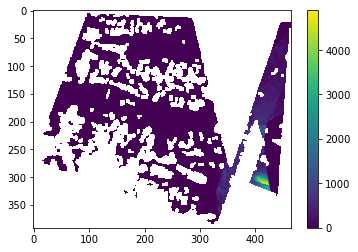

velocity_20210420_20210430_100m_PS.tif


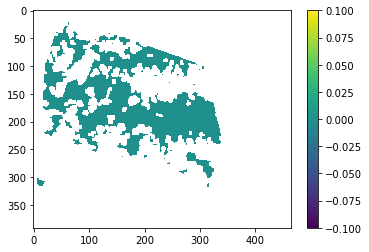

velocity_20210430_20210517_100m_PS.tif


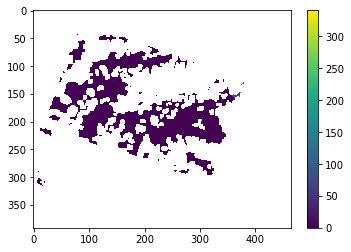

velocity_20210517_20210601_100m_PS.tif


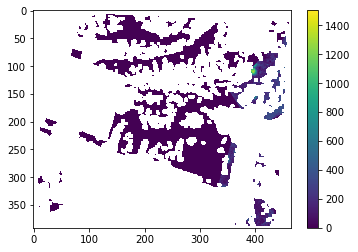

velocity_20210601_20210608_100m_PS.tif


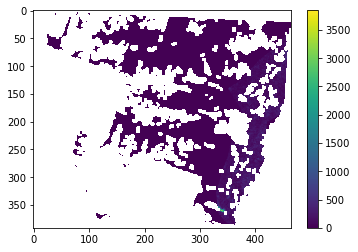

velocity_20210608_20210613_100m_PS.tif


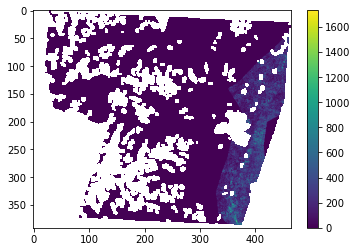

velocity_20210613_20210619_100m_PS.tif


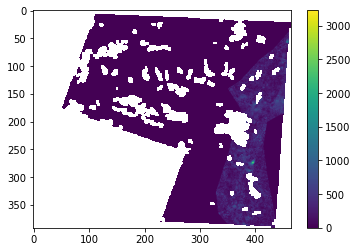

velocity_20210619_20210627_100m_PS.tif


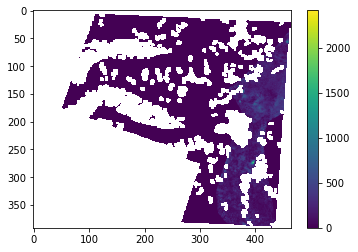

velocity_20210627_20210703_100m_PS.tif


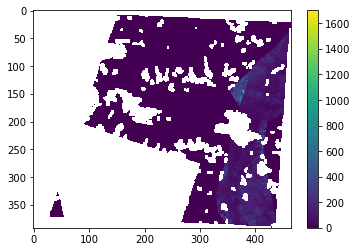

velocity_20210703_20210719_100m_PS.tif


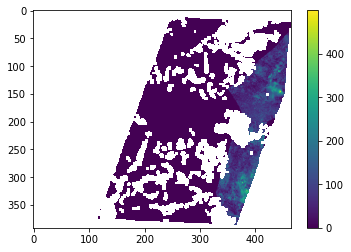

velocity_20210719_20210730_100m_PS.tif


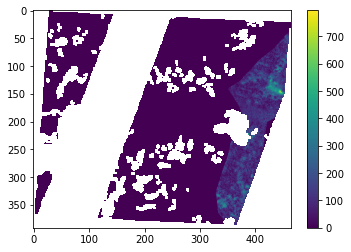

velocity_20210730_20210807_100m_PS.tif


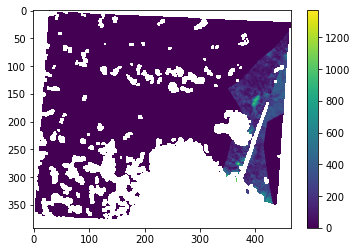

velocity_20210807_20210815_100m_PS.tif


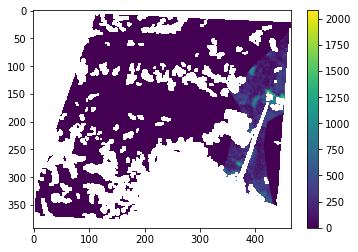

velocity_20210815_20210822_100m_PS.tif


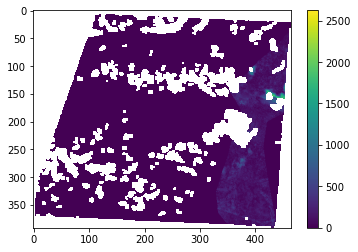

velocity_20210822_20210830_100m_PS.tif


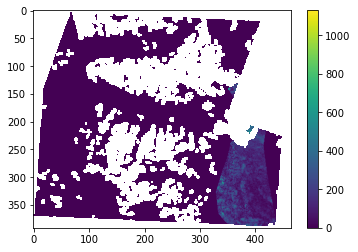

velocity_20210830_20210907_100m_PS.tif


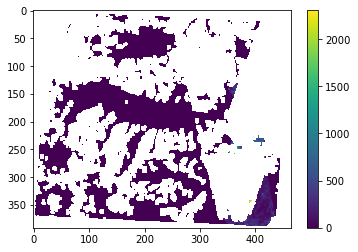

velocity_20210907_20210914_100m_PS.tif


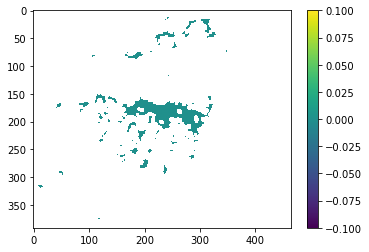

velocity_20210914_20210919_100m_PS.tif


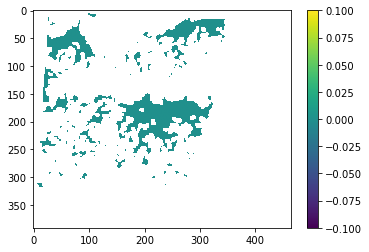

velocity_20210919_20210925_100m_PS.tif


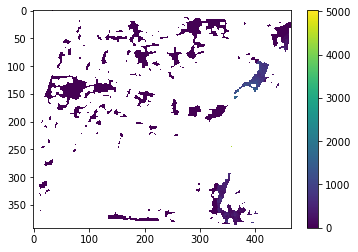

velocity_20210925_20211015_100m_PS.tif


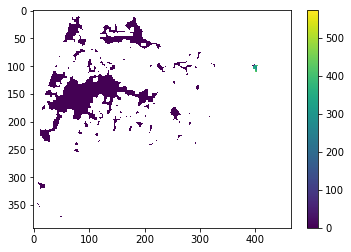

velocity_20211015_20211021_100m_PS.tif


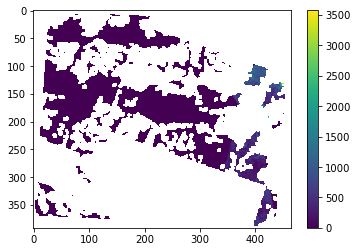

velocity_20211021_20211028_100m_PS.tif


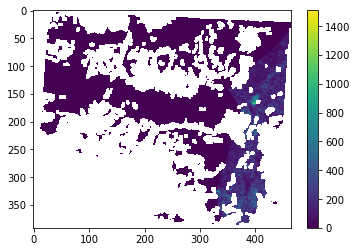

velocity_20211028_20211104_100m_PS.tif


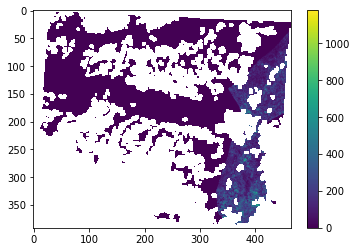

velocity_20211104_20211113_100m_PS.tif


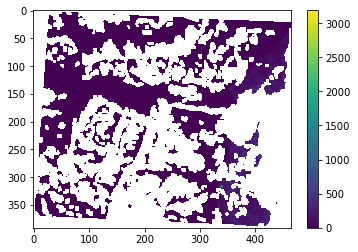

velocity_20220131_20220215_100m_PS.tif


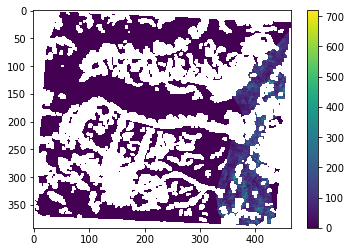

velocity_20220215_20220220_100m_PS.tif


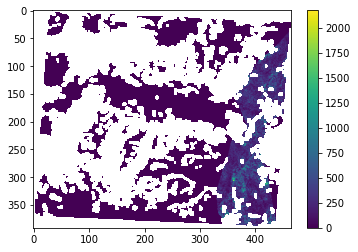

velocity_20220220_20220228_100m_PS.tif


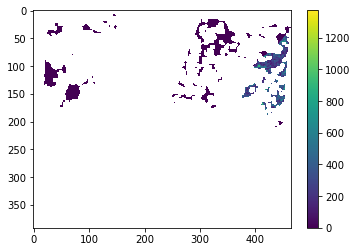

velocity_20220228_20220402_100m_PS.tif


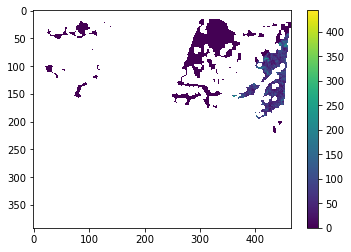

velocity_20220402_20220413_100m_PS.tif


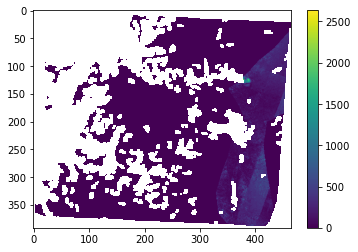

velocity_20220413_20220420_100m_PS.tif


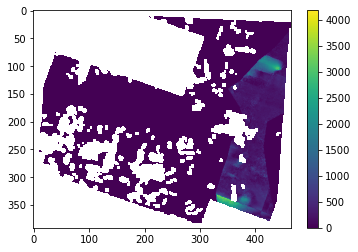

velocity_20220420_20220429_100m_PS.tif


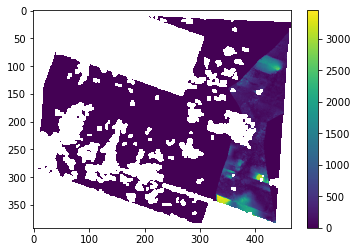

velocity_20220429_20220506_100m_PS.tif


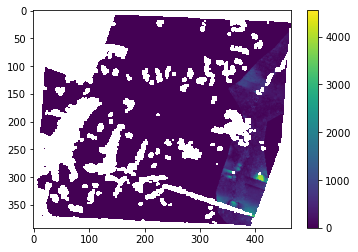

velocity_20220506_20220518_100m_PS.tif


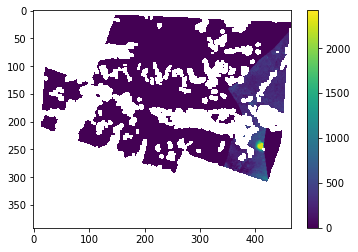

velocity_20220518_20220526_100m_PS.tif


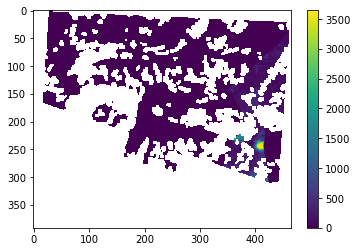

velocity_20220526_20220604_100m_PS.tif


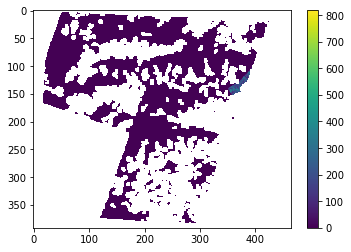

velocity_20220604_20220616_100m_PS.tif


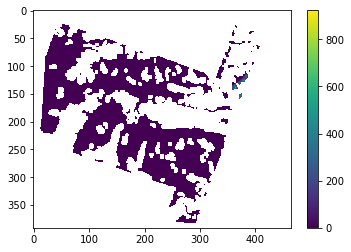

velocity_20220616_20220624_100m_PS.tif


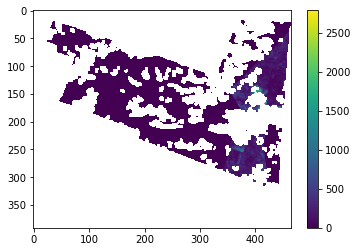

velocity_20220624_20220703_100m_PS.tif


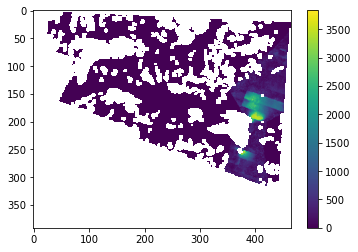

velocity_20220703_20220726_100m_PS.tif


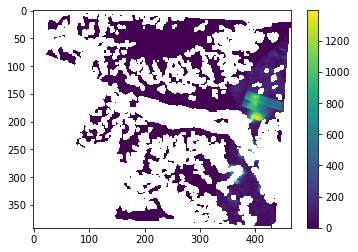

velocity_20220726_20220807_100m_PS.tif


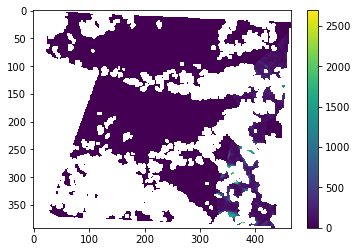

velocity_20220807_20220812_100m_PS.tif


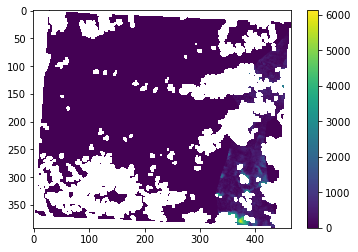

velocity_20220812_20220820_100m_PS.tif


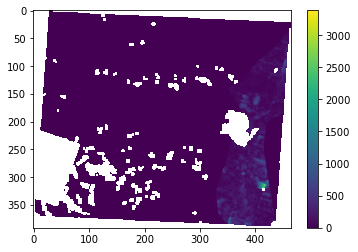

velocity_20220820_20220830_100m_PS.tif


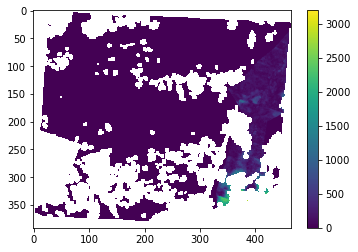

velocity_20220830_20220905_100m_PS.tif


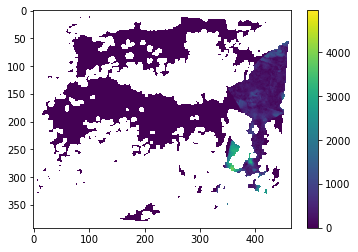

velocity_20220905_20220916_100m_PS.tif


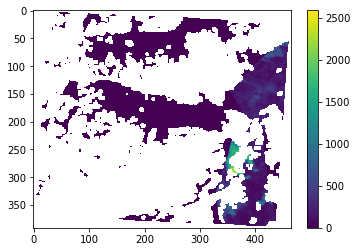

velocity_20220916_20220925_100m_PS.tif


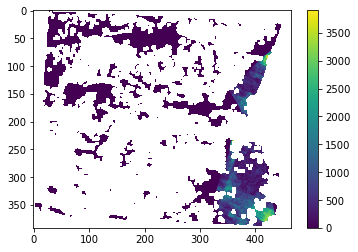

velocity_20220925_20221006_100m_PS.tif


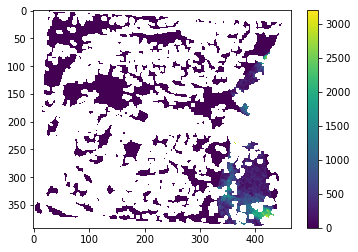

velocity_20221006_20221013_100m_PS.tif


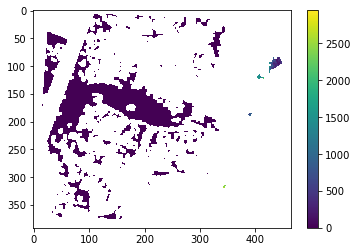

velocity_20221013_20221022_100m_PS.tif


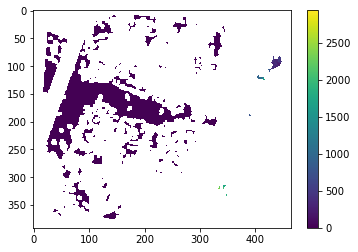

velocity_20221022_20221101_100m_PS.tif


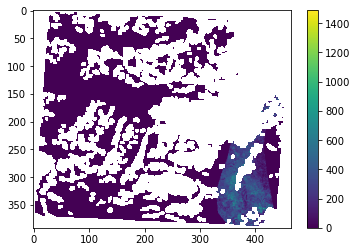

velocity_20221101_20221106_100m_PS.tif


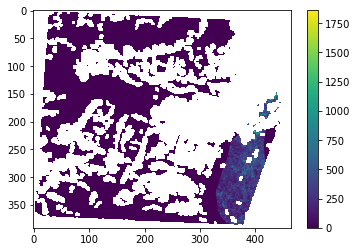

velocity_20221106_20221111_100m_PS.tif


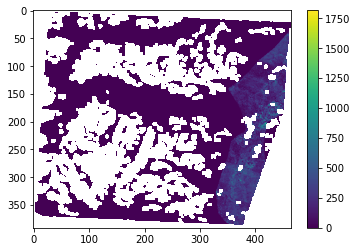

velocity_20221111_20221116_100m_PS.tif


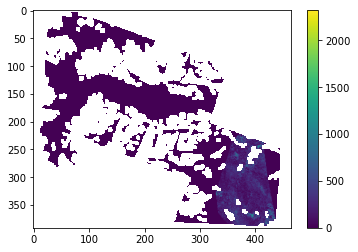

152 files found.


In [10]:
# initialize lists to store info for each velocity map
ds1s = []; ds2s = []; dts = []; chipsizes = []; sats = []; data_fracs = []; err_vx = []; err_vy = []; err_v = []; 
file_count = 0

# for each velocity map
for output in os.listdir(autorift_outp):
    if output.startswith('velocity') and output.endswith('.tif'): #and not 'S2' in output:
        print(output) # display file names
        [filetype, ds1, ds2, chipsize, sat] = output.split('_') # grab info from filename
        d1 = datetime.datetime.strptime(ds1, '%Y%m%d'); d2 = datetime.datetime.strptime(ds2, '%Y%m%d')
        dt = d2-d1
        sat = sat.split('.')[0] # s
        ds1s.append(ds1); ds2s.append(ds2); dts.append(dt.days)
        chipsizes.append(int(chipsize[:-1])); sats.append(sat)
        
        # read in the velocity map
        v_reader = rio.open(autorift_outp+output)
        vx = v_reader.read(1); vy = v_reader.read(2) # grab vx and vy
        v = np.sqrt(vx**2 + vy**2) # calculate vmag from vx and vy
        # raster grid value (UTM coordinates)
        x_vals = np.arange(v_reader.bounds.left, v_reader.bounds.right+1, v_reader.transform[0])
        y_vals = np.arange(v_reader.bounds.bottom, v_reader.bounds.top+1, v_reader.transform[0])
        
        # Read in stable surface mask
        ssm_reader = rio.open(refvpath+'ssm_'+chipsize+'.tif') # stable surface mask
        ssm = ssm_reader.read(1)
        if ssm.shape != vx.shape:
            ssm = ssm[:vx.shape[0],:vx.shape[1]]
        
        # grab data fraction in glacier outline
        cropped_img, cropped_transform = mask(v_reader, shapes, nodata= -3e5, crop=True)
        if cropped_img.shape[0] == 3:
            cropped_v = cropped_img[2] # grab the third band [2]
        else:
            cropped_vx = cropped_img[0]; cropped_vy = cropped_img[1]
            cropped_v = np.sqrt(cropped_vx**2 + cropped_vy**2) 
        cropped_v_filled = cropped_v.copy()
        cropped_v_filled[np.isnan(cropped_v_filled)] = 0 # fill all Nans with 0
        total_pixels = np.count_nonzero(cropped_v_filled >= 0) # count number of non-nodata values (negative)
        cropped_v[cropped_v < 0] = np.NaN # turn no data values (negative) into NaNs
        pixels_w_data = len(cropped_v[cropped_v >= 0]) # count non Nans (number of pixels with data)
        if pixels_w_data > 0:
            data_percent = int(pixels_w_data/total_pixels*100)
            data_fracs.append(data_percent)
            empty = False
        else:
            data_fracs.append(0)
            empty = True
#         plt.imshow(cropped_v); plt.colorbar(); plt.title(str(data_percent)+' %'); plt.show() # check visually
            
#         # Grab off-ice velocities using stable surface mask
#         ssm[ssm > 0] = 2 # turn ice into 2
#         ssm[ssm == 0] = 1 # turn stable surfaces into 1
#         ssm[ssm == 2] = 0 # turn ice into 0s
        ssm_masked_vx = ssm*vx; ssm_masked_vy = ssm*vy; ssm_masked_v = ssm*v 
        plt.imshow(ssm*v,vmin=0); plt.colorbar(); plt.show()
        # calculate RMSE [m/d]
        err_vx.append(np.sqrt(np.nanmean(ssm_masked_vx**2))/365)
        err_vy.append(np.sqrt(np.nanmean(ssm_masked_vy**2))/365)
        err_v.append(np.sqrt(np.nanmean(ssm_masked_v**2))/365)
        
        # get ready for next iteration
        del v, vx, vy, empty
        file_count += 1
        
print(file_count, 'files found.')

In [11]:
df = pd.DataFrame(list(zip(ds1s, ds2s, chipsizes, sats, dts, data_fracs, err_vx, err_vy, err_v)),
                 columns=['ds1','ds2','min_chip_size','sat','dt_days','data_percent',
                          'err_vx','err_vy','err_v'])
df.sort_values(by=['ds1','min_chip_size','sat'])
df

,ds1,ds2,min_chip_size,sat,dt_days,data_percent,err_vx,err_vy,err_v
0,20210119,20210127,100,S2,8,12,0.340220,0.824921,0.892325
1,20210127,20210203,100,S2,7,63,0.408723,0.575581,0.705938
2,20210203,20210208,100,S2,5,60,0.553402,0.553567,0.782746
3,20210208,20210213,100,S2,5,64,0.192782,0.227676,0.298330
4,20210213,20210223,100,S2,10,69,0.096823,0.170120,0.195743
...,...,...,...,...,...,...,...,...,...
147,20221013,20221022,100,PS,9,51,0.391145,0.328981,0.511099
148,20221022,20221101,100,PS,10,58,0.133175,0.304567,0.332411
149,20221101,20221106,100,PS,5,53,0.264636,0.292160,0.394195
150,20221106,20221111,100,PS,5,67,0.177178,0.287049,0.337326


In [12]:
# convert dates to datetime objects
df.ds1 = pd.to_datetime(df.ds1, format='%Y%m%d')
df.ds2 = pd.to_datetime(df.ds2, format='%Y%m%d')
df['mid_date'] = (df.ds2-df.ds1)/2+df.ds1
df = df[df.min_chip_size == 100]
df = df.dropna()
df

,ds1,ds2,min_chip_size,sat,dt_days,data_percent,err_vx,err_vy,err_v,mid_date
0,2021-01-19,2021-01-27,100,S2,8,12,0.340220,0.824921,0.892325,2021-01-23 00:00:00
1,2021-01-27,2021-02-03,100,S2,7,63,0.408723,0.575581,0.705938,2021-01-30 12:00:00
2,2021-02-03,2021-02-08,100,S2,5,60,0.553402,0.553567,0.782746,2021-02-05 12:00:00
3,2021-02-08,2021-02-13,100,S2,5,64,0.192782,0.227676,0.298330,2021-02-10 12:00:00
4,2021-02-13,2021-02-23,100,S2,10,69,0.096823,0.170120,0.195743,2021-02-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...
147,2022-10-13,2022-10-22,100,PS,9,51,0.391145,0.328981,0.511099,2022-10-17 12:00:00
148,2022-10-22,2022-11-01,100,PS,10,58,0.133175,0.304567,0.332411,2022-10-27 00:00:00
149,2022-11-01,2022-11-06,100,PS,5,53,0.264636,0.292160,0.394195,2022-11-03 12:00:00
150,2022-11-06,2022-11-11,100,PS,5,67,0.177178,0.287049,0.337326,2022-11-08 12:00:00


### Export CSV to a file

In [13]:
outfilepath = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/error_csvs/LO_dt5to60.csv' # enter path and name of CSV file to save to
df.to_csv(outfilepath)

## Plot errors

In [11]:
# read in csv fiel
df = pd.read_csv('/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/error_csvs/AV_dt5to60_S2.csv')
df.ds1 = pd.to_datetime(df.ds1, format='%Y-%m-%d')
df.ds2 = pd.to_datetime(df.ds2, format='%Y-%m-%d')
df['mid_date'] = (df.ds2-df.ds1)/2+df.ds1
df.head()

,Unnamed: 0,ds1,ds2,min_chip_size,sat,dt_days,data_percent,err_vx,err_vy,err_v,mid_date
0,0,2021-09-02,2021-09-07,100,S2,5,85,0.684871,1.907863,2.027065,2021-09-04 12:00:00
1,1,2020-03-16,2020-03-28,100,S2,12,39,0.398646,0.336156,0.521459,2020-03-22 00:00:00
2,2,2021-07-11,2021-07-17,100,S2,6,50,0.330425,0.233656,0.404692,2021-07-14 00:00:00
3,3,2020-06-10,2020-06-15,100,S2,5,10,0.365693,0.374277,0.523273,2020-06-12 12:00:00
4,4,2021-04-03,2021-04-12,100,S2,9,75,0.362613,0.492910,0.611922,2021-04-07 12:00:00


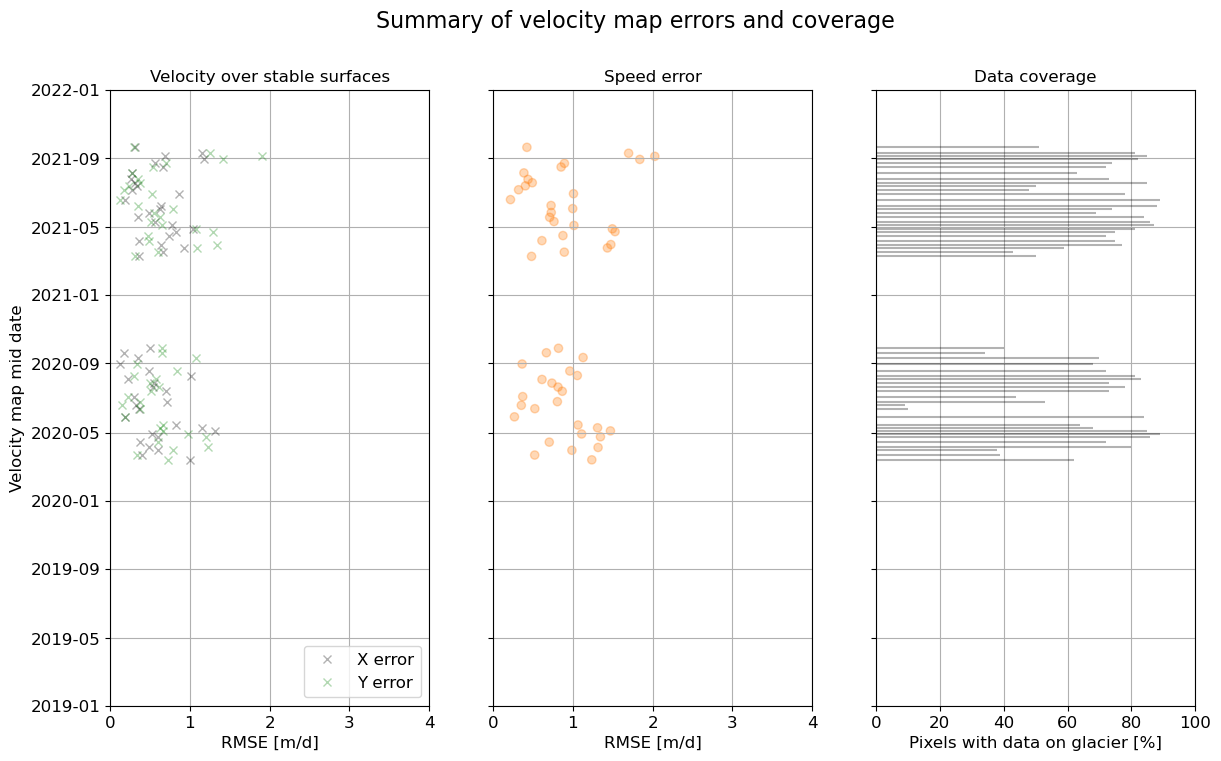

In [12]:
# create subplots with common y-axis
fs = 12
a = 0.3 # control opacity
colors_dict = {'LS':'tab:blue', 'S2':'tab:orange', 'S1':'tab:green', 'PS':'tab:red'}
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,8), sharey=True)

# 1) plot velocity residuals over stable surfaces
ax1.set_title("Velocity over stable surfaces", fontsize=fs)
ax1.plot(df.err_vx,df.mid_date, 'kx', alpha=a)
ax1.plot(df.err_vy,df.mid_date, 'gx', alpha=a)
ax1.set_xlim(0, 4)
ax1.set_xlabel('RMSE [m/d]', fontsize=fs); ax1.set_ylabel('Velocity map mid date', fontsize=fs);
ax1.legend(['X error','Y error'], loc='lower right', fontsize=fs)

# 2) plot speed residual of stable surfaces (scaled by max speed)
ax2.set_title("Speed error", fontsize=fs)
ax2.scatter(df.err_v, df.mid_date, c=df.sat.map(colors_dict), alpha=a) # color points by satellite (see colors dict)
ax2.set_xlim(0,4)
ax2.set_xlabel('RMSE [m/d]', fontsize=fs);

# 3) percent coverage on glacier
ax3.set_title("Data coverage")
ax3.hlines(df.mid_date, np.zeros(len(df.data_percent)),df.data_percent, color='k',alpha=a)
ax3.set_xlabel('Pixels with data on glacier [%]', fontsize=fs)
ax3.set_xlim(0,100)

# all plots
for ax in [ax1, ax2, ax3]:
    ax.tick_params(labelsize=fs)
    ax.grid()
    ax.set_ylim(datetime.datetime(2019,1,1), datetime.datetime(2022,1,1))

plt.suptitle('Summary of velocity map errors and coverage', fontsize=fs+4)
plt.savefig('/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/figures/AV_vmap_errors_summary.png',dpi=300)
plt.show()